In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import tqdm

Text(0.5, 1.0, 'Finetuning Data')

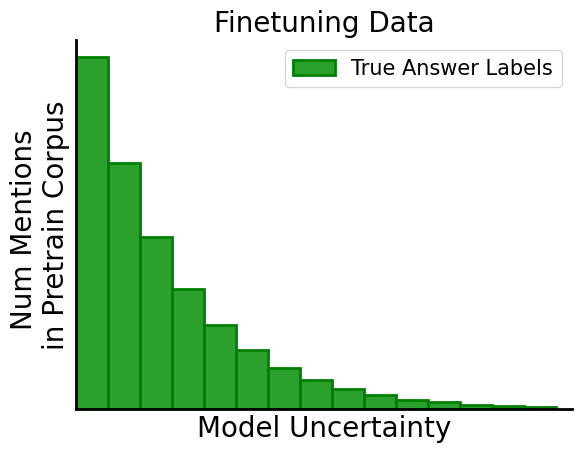

In [24]:

num_bins = 15
x = np.arange(0, num_bins)
y = 0.7**x
# plt.bar([0, 1, 2, 3, 4], [1, 1, 1, 1, 1], color="tab:red", label = "Incorrect", edgecolor='black',linewidth=2, width=0.8)
plt.bar(x, y, width=1, color = "tab:green", edgecolor='green',linewidth=2, label = "True Answer Labels")

plt.xlim(-0.5, num_bins)
plt.savefig("delete.jpg")

plt.xticks([])
plt.yticks([])

plt.xlabel("Model Uncertainty", fontsize=20)
plt.ylabel("Num Mentions \nin Pretrain Corpus", fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(fontsize=15)

plt.title("Finetuning Data", fontsize=20)


Text(0.5, 1.0, 'Finetuning Data')

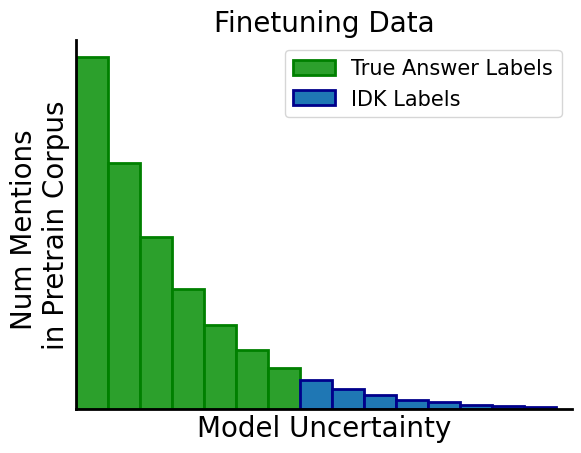

In [25]:

num_bins = 15
x = np.arange(0, num_bins)
y = 0.7**x
# plt.bar([0, 1, 2, 3, 4], [1, 1, 1, 1, 1], color="tab:red", label = "Incorrect", edgecolor='black',linewidth=2, width=0.8)
plt.bar(x[:7], y[:7], width=1, color = "tab:green", edgecolor='green',linewidth=2, label = "True Answer Labels")
plt.bar(x[7:], y[7:], width=1, color = "tab:blue", edgecolor='darkblue',linewidth=2, label = "IDK Labels")


plt.xlim(-0.5, num_bins)
plt.savefig("delete.jpg")

plt.xticks([])
plt.yticks([])

plt.xlabel("Model Uncertainty", fontsize=20)
plt.ylabel("Num Mentions \nin Pretrain Corpus", fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize=15)

plt.title("Finetuning Data", fontsize=20)

In [11]:
num_pretrain_entities = np.load("num_pretrain_entities/triviaqa_validation.npy", )

In [12]:
num_pretrain_entities_bins = np.array([np.inf, 1e7, 1e5, 1e3, 1e1, 0])


172
2662
4986
1388
2105


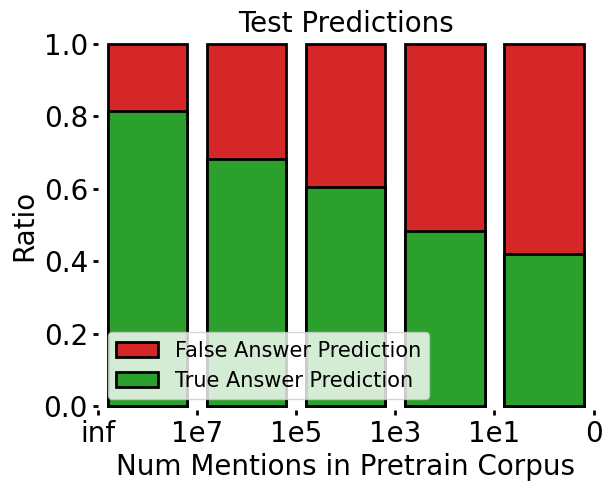

In [23]:
model_path = "ckpts/sft_triviaqa_llama7B/checkpoint_20000/hf_model/"
answers_correct = np.load(os.path.join(model_path, "test_answers_correct.npy"))


accuracies = []

for i in range(len(num_pretrain_entities_bins) - 1):
    bin_upper = num_pretrain_entities_bins[i]
    bin_lower = num_pretrain_entities_bins[i + 1]

    indices = np.where((num_pretrain_entities >= bin_lower) & (num_pretrain_entities < bin_upper))[0]
    print(len(indices))

    accuracies.append(np.mean(answers_correct[indices]))


plt.bar([0, 1, 2, 3, 4], [1, 1, 1, 1, 1], color="tab:red", label = "False Answer Prediction", edgecolor='black',linewidth=2, width=0.8)
plt.bar([0, 1, 2, 3, 4], accuracies, color="tab:green", label = "True Answer Prediction", edgecolor='black',linewidth=2, width=0.8)

plt.xlabel("Num Mentions in Pretrain Corpus", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.ylim([-0.01, 1.01])
plt.xlim([-0, 4.5])

plt.xticks(np.array([0, 1, 2, 3, 4, 5])-0.5, ["inf", "1e7", "1e5", "1e3", "1e1", 0], fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(axis='both', which='major', width=2)
plt.box(False)

plt.title("Test Predictions", fontsize=20)
plt.legend(fontsize=15, loc='lower left')



172
2662
4986
1388
2105


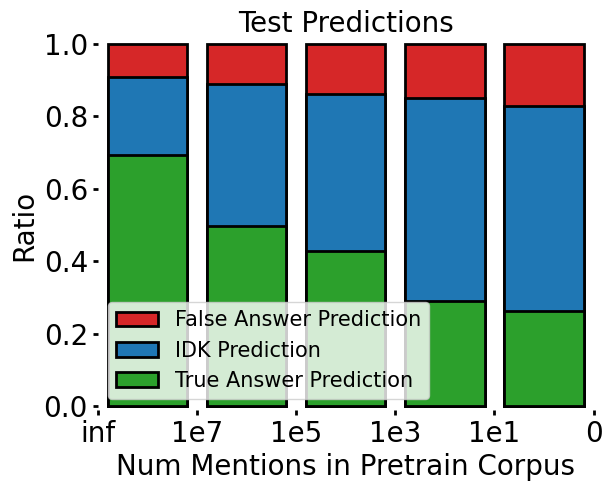

In [22]:
model_path = "ckpts/sft2_triviaqa_llama7B_t0.9/checkpoint_20000/hf_model/"
answers_correct = np.load(os.path.join(model_path, "test_answers_correct.npy"))
answers_dont_know = np.load(os.path.join(model_path, "test_answers_dont_know.npy"))

accuracies = []
dont_know_frac = []

for i in range(len(num_pretrain_entities_bins) - 1):
    bin_upper = num_pretrain_entities_bins[i]
    bin_lower = num_pretrain_entities_bins[i + 1]

    indices = np.where((num_pretrain_entities >= bin_lower) & (num_pretrain_entities < bin_upper))[0]
    print(len(indices))

    accuracies.append(np.mean(answers_correct[indices]))
    dont_know_frac.append(np.mean(answers_dont_know[indices]))

accuracies = np.array(accuracies)
dont_know_frac = np.array(dont_know_frac)

# plt.bar([0, 1, 2, 3, 4], [1, 1, 1, 1, 1], color="tab:red", label="Incorrect")
# plt.bar([0, 1, 2, 3, 4], accuracies+dont_know_frac, color="tab:blue", label="IDK")

# plt.bar([0, 1, 2, 3, 4], accuracies, color="tab:green", label="Correct")
# plt.xlabel("Uncertainty")
# plt.ylabel("Ratio")

# plt.legend()



plt.bar([0, 1, 2, 3, 4], [1, 1, 1, 1, 1], color="tab:red", label = "False Answer Prediction", edgecolor='black',linewidth=2, width=0.8)
plt.bar([0, 1, 2, 3, 4], accuracies+dont_know_frac, color="tab:blue", label="IDK Prediction", edgecolor='black',linewidth=2, width=0.8)
plt.bar([0, 1, 2, 3, 4], accuracies, color="tab:green", label = "True Answer Prediction", edgecolor='black',linewidth=2, width=0.8)

plt.xlabel("Num Mentions in Pretrain Corpus", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.ylim([-0.01, 1.01])
plt.xlim([-0.5, 4.5])


plt.xticks(np.array([0, 1, 2, 3, 4, 5])-0.5, ["inf", "1e7", "1e5", "1e3", "1e1", 0], fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(axis='both', which='major', width=2)
plt.box(False)
plt.title("Test Predictions", fontsize=20)

#legend bottom right
plt.legend(fontsize=15, loc='lower left')


In [57]:
#^number of incorrect predictions relatively constant across bins
#TEST INPUT RARITY